In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [2]:
Rain_train = pd.read_csv('Data/train.csv')
Rain_train.head(4)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1


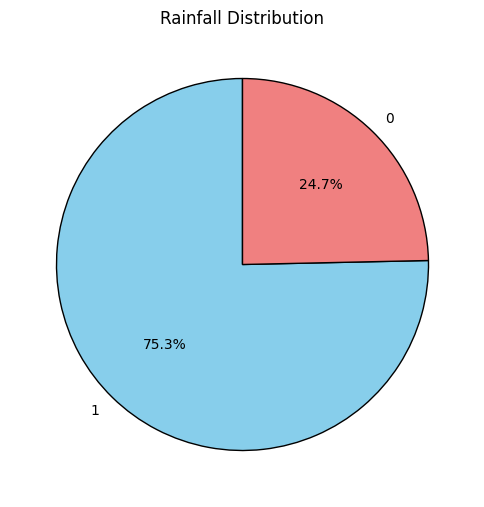

In [3]:
# days raii/norain
rainfall_counts = Rain_train['rainfall'].value_counts()  
plt.figure(figsize=(6, 7))  
plt.pie(rainfall_counts, labels=rainfall_counts.index, autopct='%1.1f%%',  
        colors=['skyblue', 'lightcoral'], startangle=90, wedgeprops={'edgecolor': 'black'})  
plt.title("Rainfall Distribution")  
plt.savefig('fig/Rain_Dis.png')
plt.show()  
# 0 = NoRain ; 1 = Rain

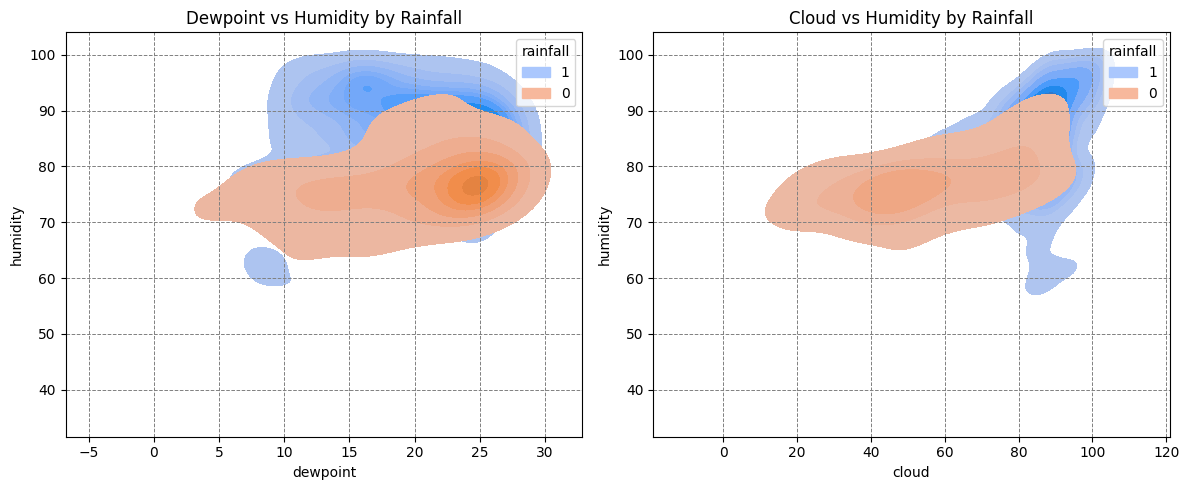

In [4]:
colors = sns.color_palette("Set1") 
Rain_train["rainfall"] = Rain_train["rainfall"].astype(str)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Dewpoint vs Humidity
sns.kdeplot(
    data=Rain_train, x="dewpoint", y="humidity", hue="rainfall",
    palette="coolwarm", fill=True, ax=axes[0]
)
axes[0].set_title('Dewpoint vs Humidity by Rainfall')
axes[0].grid(color='gray', linestyle='--', linewidth=0.7)

# Cloud vs Humidity
sns.kdeplot(
    data=Rain_train, x="cloud", y="humidity", hue="rainfall",
    palette="coolwarm", fill=True, ax=axes[1]
)
axes[1].set_title('Cloud vs Humidity by Rainfall')
axes[1].grid(color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

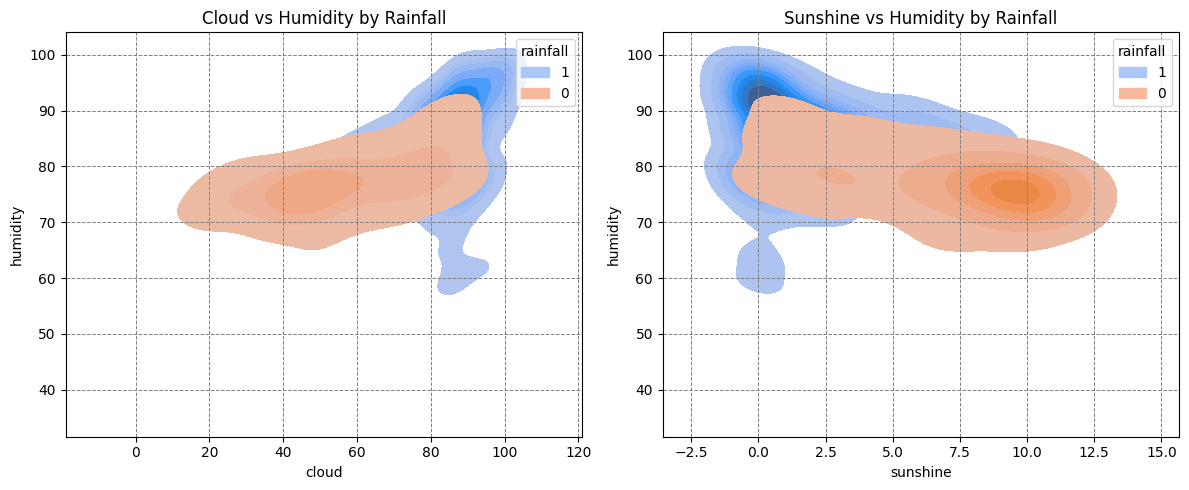

In [5]:
colors = sns.color_palette("Set1") 
Rain_train["rainfall"] = Rain_train["rainfall"].astype(str)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Dewpoint vs Humidity
sns.kdeplot(
    data=Rain_train, x="cloud", y="humidity", hue="rainfall",
    palette="coolwarm", fill=True, ax=axes[0]
)
axes[0].set_title('Cloud vs Humidity by Rainfall')
axes[0].grid(color='gray', linestyle='--', linewidth=0.7)

# Cloud vs Humidity
sns.kdeplot(
    data=Rain_train, x="sunshine", y="humidity", hue="rainfall",
    palette="coolwarm", fill=True, ax=axes[1]
)
axes[1].set_title('Sunshine vs Humidity by Rainfall')
axes[1].grid(color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.savefig('fig/Cloud_Sunshine.png')
plt.show()

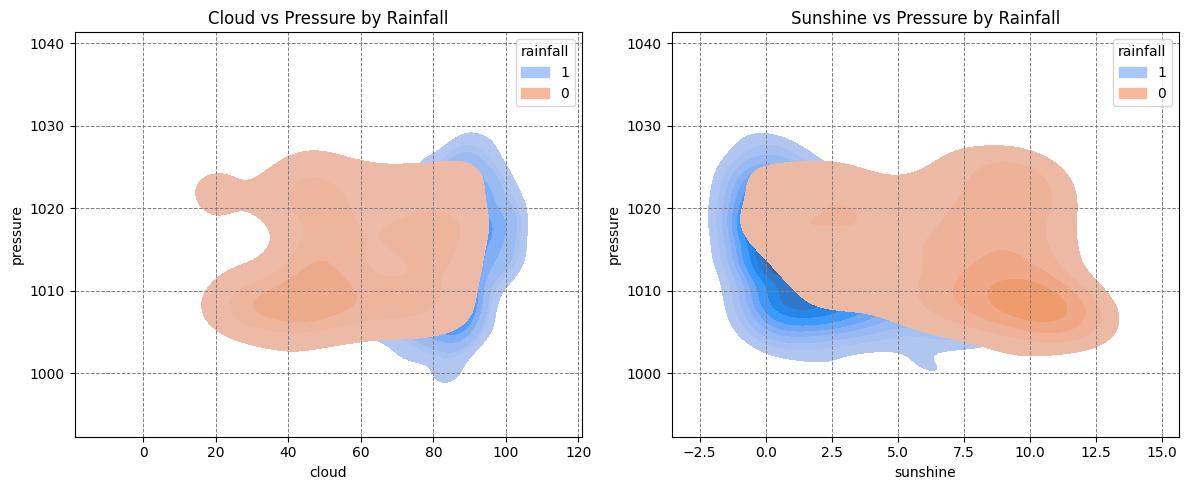

In [6]:
colors = sns.color_palette("Set1") 
Rain_train["rainfall"] = Rain_train["rainfall"].astype(str)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Dewpoint vs Humidity
sns.kdeplot(
    data=Rain_train, x="cloud", y="pressure", hue="rainfall",
    palette="coolwarm", fill=True, ax=axes[0]
)
axes[0].set_title('Cloud vs Pressure by Rainfall')
axes[0].grid(color='gray', linestyle='--', linewidth=0.7)

# Cloud vs Humidity
sns.kdeplot(
    data=Rain_train, x="sunshine", y="pressure", hue="rainfall",
    palette="coolwarm", fill=True, ax=axes[1]
)
axes[1].set_title('Sunshine vs Pressure by Rainfall')
axes[1].grid(color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.savefig('fig/Cloud_Sunshine_Presure.png')
plt.show()

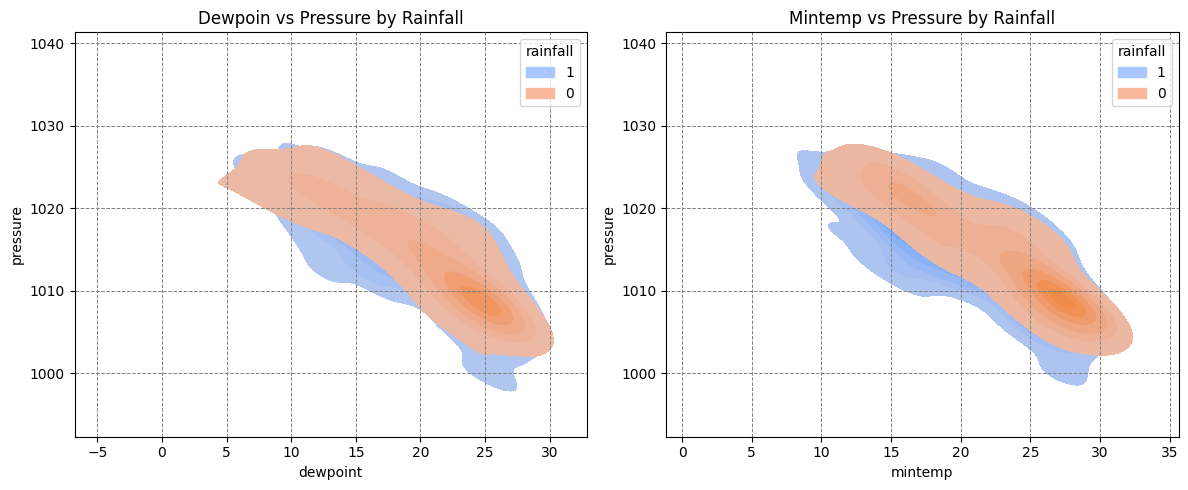

In [7]:
colors = sns.color_palette("Set1") 
Rain_train["rainfall"] = Rain_train["rainfall"].astype(str)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Dewpoint vs Humidity
sns.kdeplot(
    data=Rain_train, x="dewpoint", y="pressure", hue="rainfall",
    palette="coolwarm", fill=True, ax=axes[0]
)
axes[0].set_title('Dewpoin vs Pressure by Rainfall')
axes[0].grid(color='gray', linestyle='--', linewidth=0.7)

# Cloud vs Humidity
sns.kdeplot(
    data=Rain_train, x="mintemp", y="pressure", hue="rainfall",
    palette="coolwarm", fill=True, ax=axes[1]
)
axes[1].set_title('Mintemp vs Pressure by Rainfall')
axes[1].grid(color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.savefig('fig/Dewpoint_Mintemp_Presure.png')
plt.show()

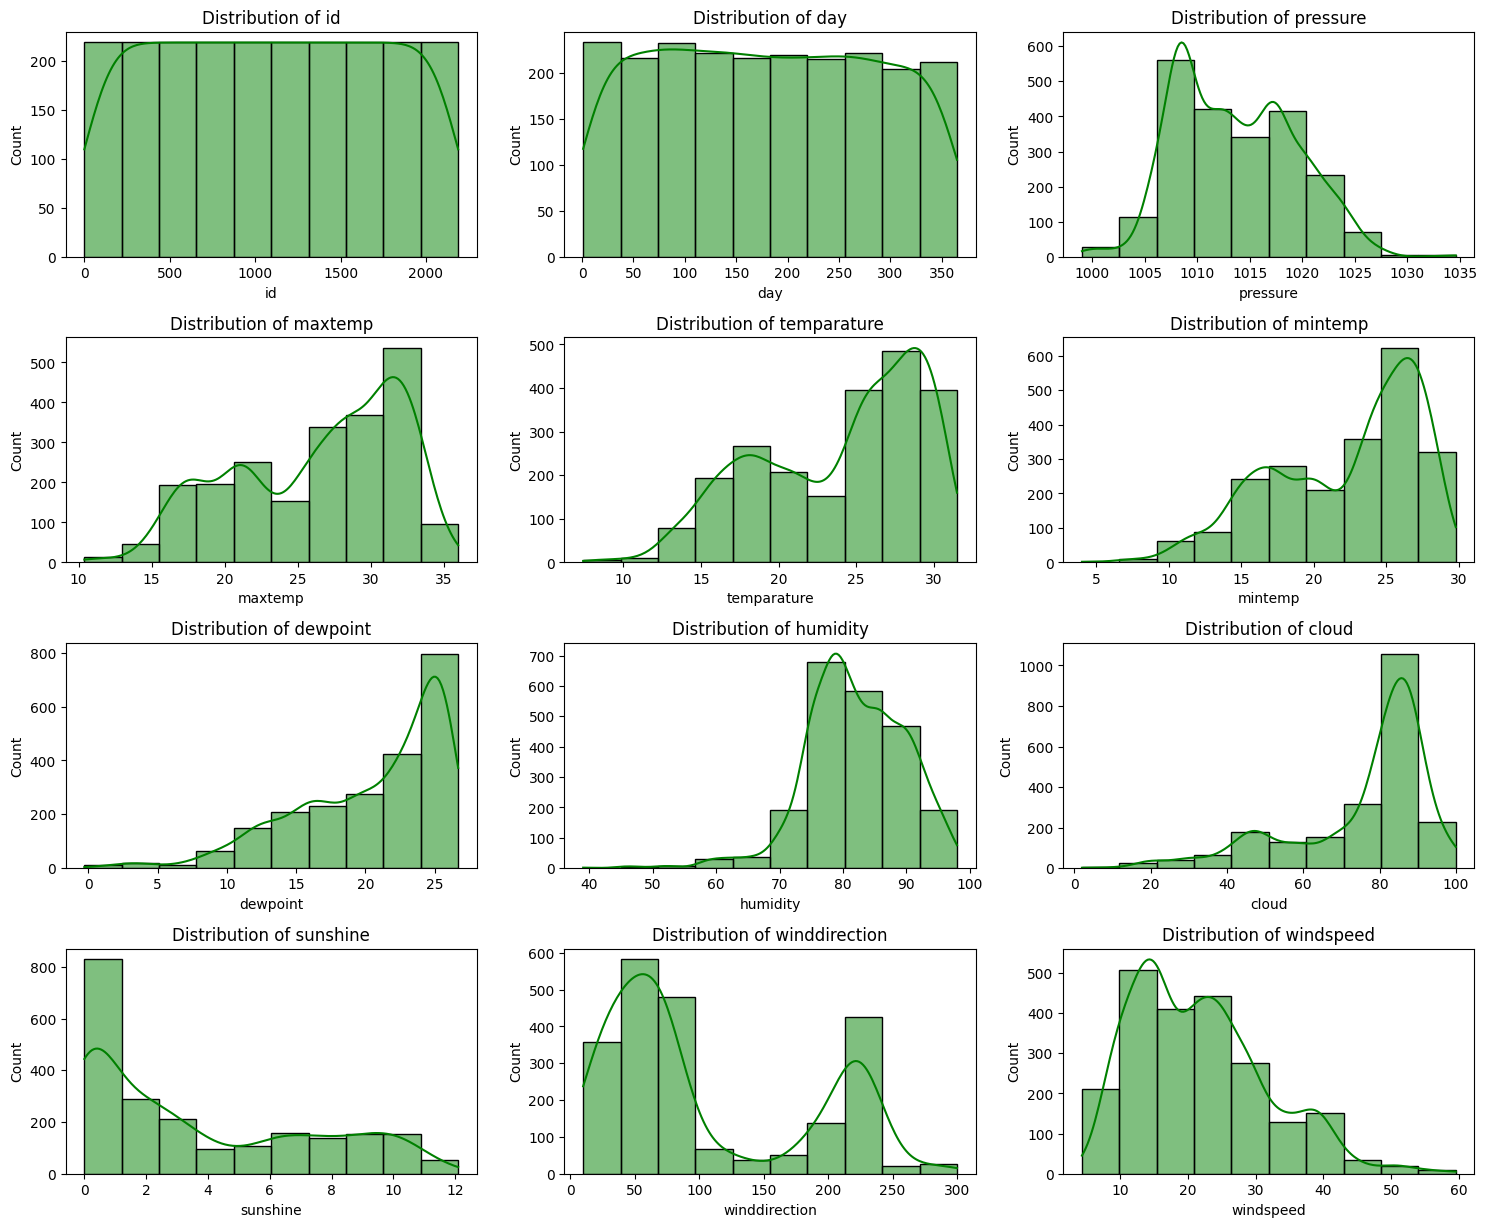

In [8]:
Rain_Features = Rain_train.drop(['rainfall'], axis=1)
plt.figure(figsize=(15, 15))

for i, col in enumerate(Rain_Features, 1):  
    plt.subplot(5, 3, i)  
    sns.histplot(Rain_train[col], bins=10, kde=True, color='Green', edgecolor='black')  
    plt.title(f"Distribution of {col}")  

plt.tight_layout()
plt.savefig('fig/Dis_Colum.png')
plt.show()

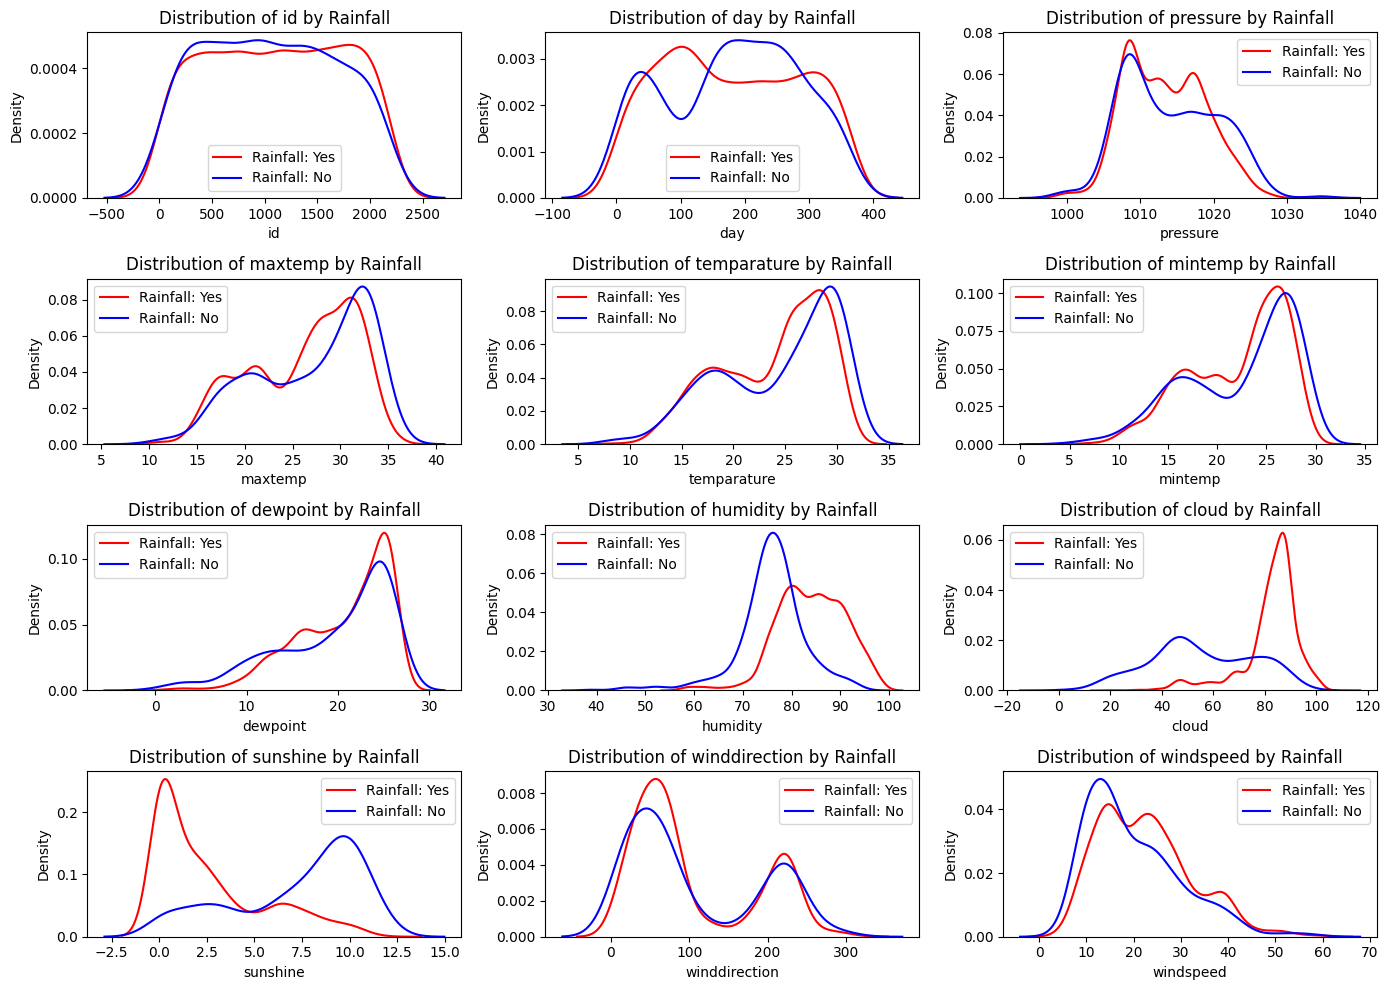

In [9]:
Rain_Features = Rain_train.drop(['rainfall'], axis=1)
plt.figure(figsize=(14, 10))
for i, col in enumerate(Rain_Features, 1):
    plt.subplot(4, 3, i)
    sns.kdeplot(Rain_train[col][Rain_train["rainfall"] == '1'], color='red', label='Rainfall: Yes')
    sns.kdeplot(Rain_train[col][Rain_train["rainfall"] == '0'], color='blue', label='Rainfall: No')
    plt.title(f'Distribution of {col} by Rainfall')
    plt.legend()
plt.tight_layout()
plt.savefig('fig/Dis_Colum_KDE_Rain.png')
plt.show()

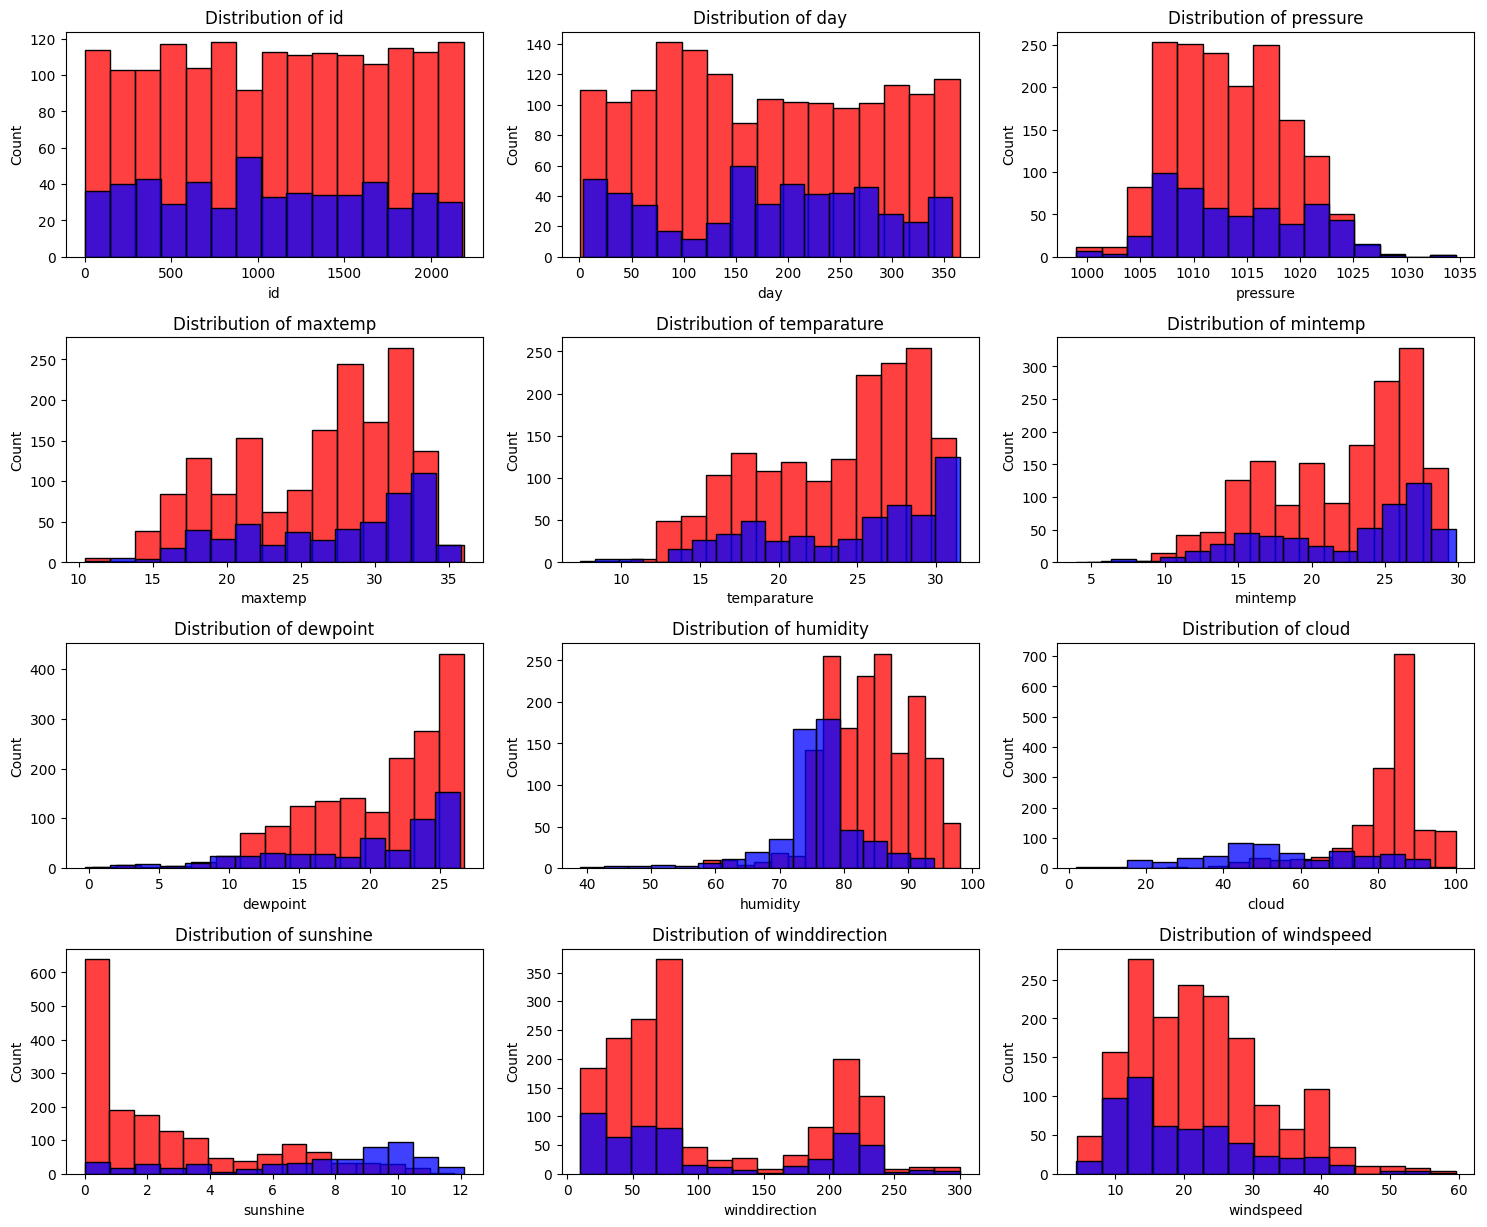

In [10]:
Rain_train["rainfall"] = Rain_train["rainfall"].astype(int)
Rain_Features = Rain_train.drop(['rainfall'], axis=1)
plt.figure(figsize=(15, 15))

for i, col in enumerate(Rain_Features, 1):  
    plt.subplot(5, 3, i)  
    sns.histplot(Rain_train[col][Rain_train["rainfall"] == 1], bins=15, kde=False, color='red', label='Rainfall: Yes')  
    sns.histplot(Rain_train[col][Rain_train["rainfall"] == 0], bins=15, kde=False, color='blue', label='Rainfall: No')  
    plt.title(f"Distribution of {col}")  

plt.tight_layout()
plt.savefig('fig/Dis_Colum_Hist_Rain.png')
plt.show()

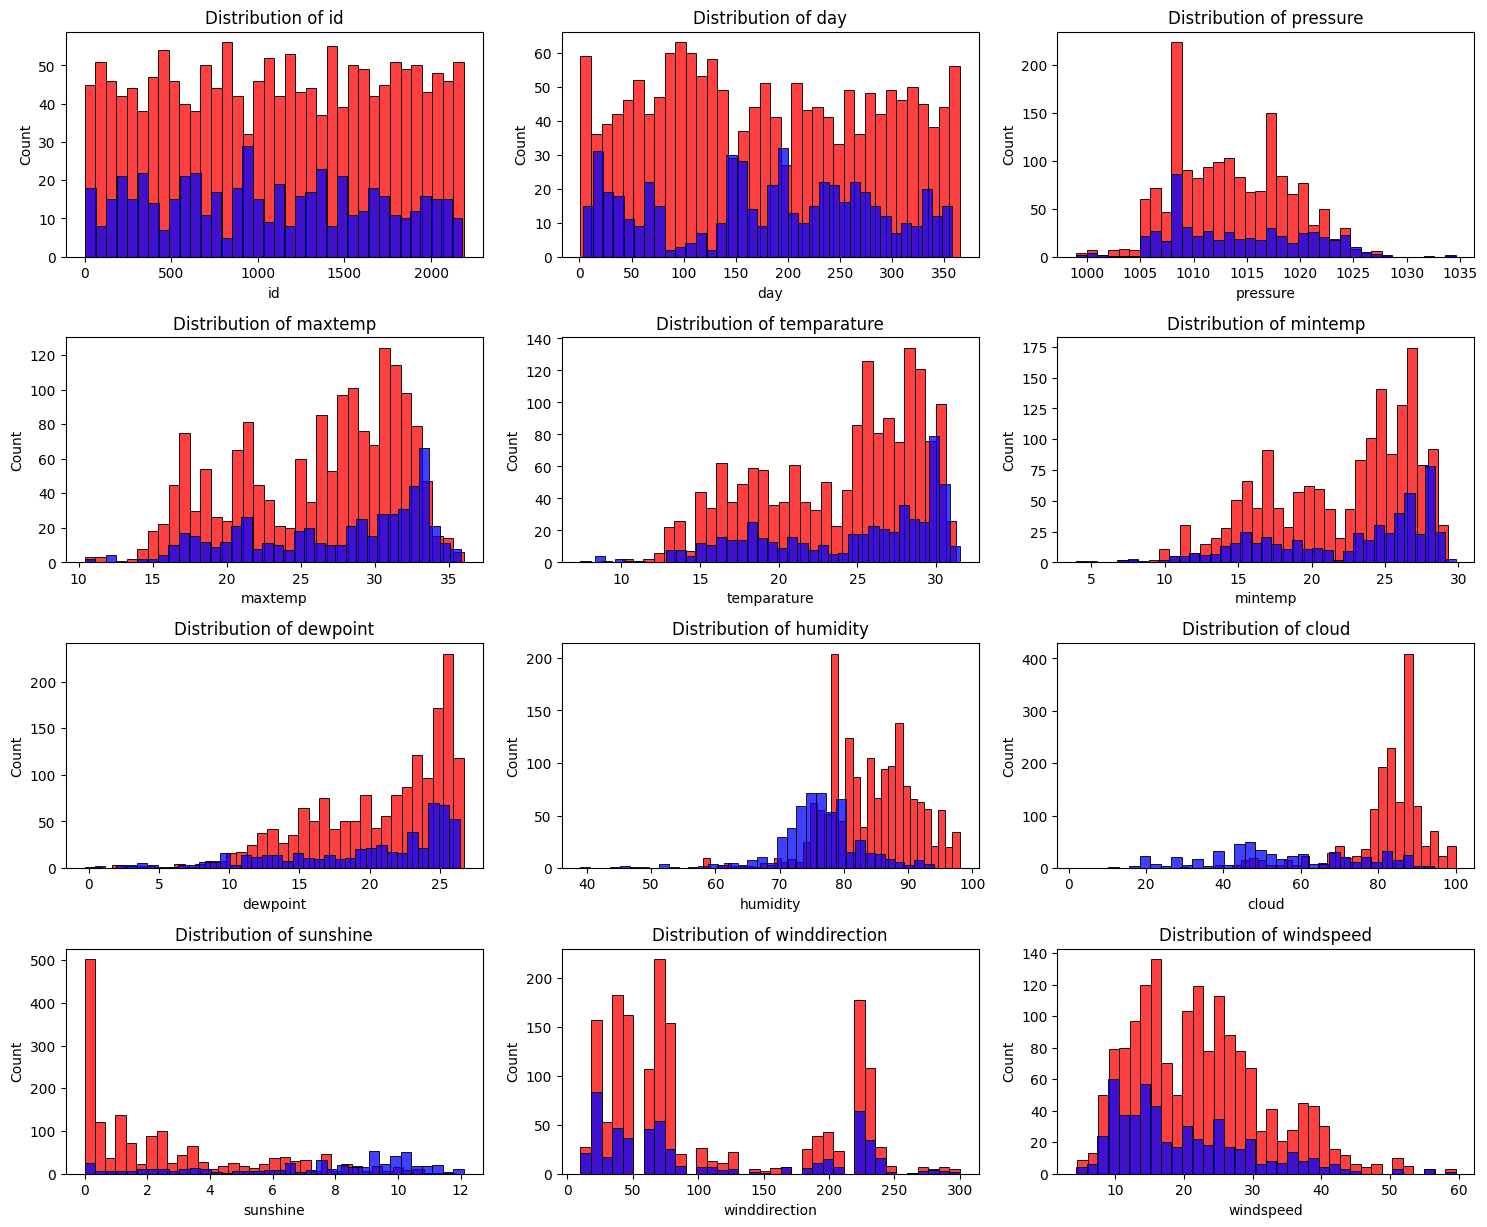

In [11]:
Rain_train["rainfall"] = Rain_train["rainfall"].astype(int)
Rain_Features = Rain_train.drop(['rainfall'], axis=1)
plt.figure(figsize=(15, 15))

for i, col in enumerate(Rain_Features, 1):  
    plt.subplot(5, 3, i)  
    sns.histplot(Rain_train[col][Rain_train["rainfall"] == 1], bins=36, kde=False, color='red', label='Rainfall: Yes')  
    sns.histplot(Rain_train[col][Rain_train["rainfall"] == 0], bins=36, kde=False, color='blue', label='Rainfall: No')  
    plt.title(f"Distribution of {col}")  

plt.tight_layout()
plt.savefig('fig/Dis_Colum_Hist_Rain.png')
plt.show()

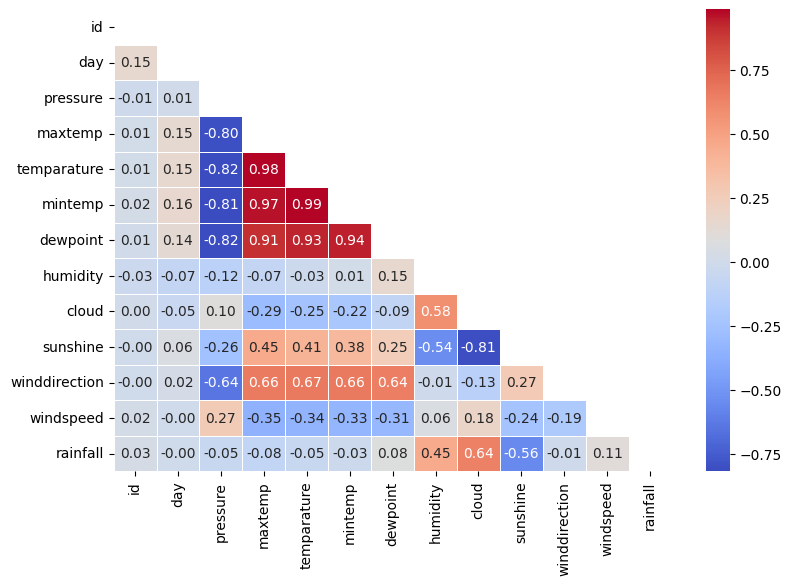

In [42]:
corr = Rain_train.corr(numeric_only=True)
cmap = sns.diverging_palette(-1, 1, s=100, l=50, n=15, center="dark", as_cmap=True)
plt.figure(figsize=(9, 6))
sns.heatmap(Rain_train.corr(numeric_only=True), annot=True, fmt='.2f', linewidth=0.5, cmap='coolwarm', mask=np.triu(Rain_train.corr(numeric_only=True)))
plt.savefig('fig/Original_corr.png')
plt.show()